In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("voice (2).csv")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


df.corr()

In [4]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
df.shape

(3168, 21)

In [6]:
print("Total number of labels: {}".format(df.shape[0]))
print("Number of male: {}".format(df[df.label == 'male'].shape[0]))
print("Number of female: {}".format(df[df.label == 'female'].shape[0]))

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [7]:
X=df.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [8]:
from sklearn.preprocessing import LabelEncoder
y=df.iloc[:,-1]

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
# Scaling the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [12]:
models = []  #  Empty list to store the models

models.append(('Logistic Regression', LogisticRegression(random_state = 42)))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('Random Forest', RandomForestClassifier(random_state = 42)))
models.append(('SVM', SVC(gamma = 'auto', random_state = 42)))
models.append(('Naive Bayes', GaussianNB()))  # GaussianNB doesn't have random_state parameter
models.append(('K Neighbors', KNeighborsClassifier()))  # K Neighbors doesn't have random_state parameter
models.append(('XG Boost', XGBClassifier(random_state = 42)))
models.append(('Gradient Boost', GradientBoostingClassifier(random_state = 42)))

results = []  # Stores evaluation metrics
name = []  # Stores names of the models

In [13]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # prediction done using the X test data
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy_{} : {}".format(name, accuracy))

Accuracy_Logistic Regression : 0.9700315457413249
Accuracy_CART : 0.9716088328075709
Accuracy_Random Forest : 0.9763406940063092
Accuracy_SVM : 0.9763406940063092
Accuracy_Naive Bayes : 0.8738170347003155
Accuracy_K Neighbors : 0.9652996845425867
Accuracy_XG Boost : 0.9747634069400631
Accuracy_Gradient Boost : 0.9747634069400631


In [14]:
from sklearn.metrics import accuracy_score

results = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

# sort by accuracy (descending)
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

for name, acc in results_sorted:
    print("Accuracy_{} : {}".format(name, acc))


Accuracy_Random Forest : 0.9763406940063092
Accuracy_SVM : 0.9763406940063092
Accuracy_XG Boost : 0.9747634069400631
Accuracy_Gradient Boost : 0.9747634069400631
Accuracy_CART : 0.9716088328075709
Accuracy_Logistic Regression : 0.9700315457413249
Accuracy_K Neighbors : 0.9652996845425867
Accuracy_Naive Bayes : 0.8738170347003155


## 1. Random Forest 

In [16]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf= rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
rf_acc = accuracy_score(y_pred_rf, y_test)

In [17]:
rf_train_score,rf_test_score

(1.0, 0.9747634069400631)

In [18]:
rf_acc

0.9747634069400631

In [19]:
1.00-0.9763

0.023700000000000054

### Random Forest with CV only

In [21]:
from sklearn.model_selection import cross_val_score #ONLY CV


rf_crossval_train = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 10)

rf_crossval_train.mean()

0.9822367806790948

In [22]:
rf_crossval_train

array([0.99212598, 0.98818898, 0.98031496, 0.98031496, 0.97628458,
       0.96837945, 0.98418972, 0.98418972, 0.99209486, 0.97628458])

In [23]:
rf_crossval_test = cross_val_score(estimator = rf, X = X_test, y = y_test, cv = 10)

rf_crossval_test.mean()

0.9731150793650795

In [24]:
rf_crossval_test

array([0.984375  , 0.984375  , 0.984375  , 0.984375  , 1.        ,
       0.95238095, 1.        , 0.93650794, 0.92063492, 0.98412698])

In [25]:
rf_crossval_y_pred = rf.predict(X_test)

In [26]:
rf_crossval_y_pred.mean()

0.5063091482649842

## 2. SVM
### Running SVM with default hyperparameter.

### Before Hyperparameter Tunning

In [29]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


In [30]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9779179810725552


In [31]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


In [32]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9589905362776026


In [33]:
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7933753943217665


## Only Param

### Linear: Only param

In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define range of C values
C_range = [0.1, 0.5, 1, 1.5, 2, 2.5]
acc_score = []

# Train and evaluate on test set for each C
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)          # fit on training data
    y_pred = svc.predict(X_test)       # predict on test data
    acc_score.append(accuracy_score(y_test, y_pred))

# Print results
print("Accuracy scores for each C:", acc_score)

# Find the best C and its accuracy
best_C_index = acc_score.index(max(acc_score))
best_C = C_range[best_C_index]
best_accuracy = acc_score[best_C_index]

print("Best C:", best_C)
print("Accuracy for best C:", best_accuracy)


Accuracy scores for each C: [0.9747634069400631, 0.9763406940063092, 0.9779179810725552, 0.9763406940063092, 0.9763406940063092, 0.9763406940063092]
Best C: 1
Accuracy for best C: 0.9779179810725552


In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define range of C values
C_range = [0.1, 0.5, 1, 1.5, 2, 2.5]

train_acc = []
test_acc = []

# Train and evaluate for each C
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    
    # Accuracy
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Print results
print("Train accuracy for each C:", train_acc)
print("Test accuracy for each C:", test_acc)

# Best C based on test accuracy
best_C_index = test_acc.index(max(test_acc))
best_C = C_range[best_C_index]

print("Best C:", best_C)
print("Train Accuracy at best C:", train_acc[best_C_index])
print("Test Accuracy at best C:", test_acc[best_C_index])


Train accuracy for each C: [0.9751381215469613, 0.9775059194948698, 0.9779005524861878, 0.9779005524861878, 0.9771112865035517, 0.9771112865035517]
Test accuracy for each C: [0.9747634069400631, 0.9763406940063092, 0.9779179810725552, 0.9763406940063092, 0.9763406940063092, 0.9763406940063092]
Best C: 1
Train Accuracy at best C: 0.9779005524861878
Test Accuracy at best C: 0.9779179810725552


### RBF: Only param

In [171]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

gamma_range = [0.01, 0.02, 0.03, 0.04, 0.05]

train_acc_rbf = []
test_acc_rbf = []

for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    svc.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    
    # Accuracy
    train_acc_rbf.append(accuracy_score(y_train, y_train_pred))
    test_acc_rbf.append(accuracy_score(y_test, y_test_pred))

# Print results
print("Train accuracy for each gamma (RBF):", train_acc_rbf)
print("Test accuracy for each gamma (RBF):", test_acc_rbf)

# Best gamma based on test accuracy
best_gamma_index = test_acc_rbf.index(max(test_acc_rbf))
best_gamma = gamma_range[best_gamma_index]

print("Best gamma (RBF):", best_gamma)
print("Train Accuracy at best gamma:", train_acc_rbf[best_gamma_index])
print("Test Accuracy at best gamma:", test_acc_rbf[best_gamma_index])


Train accuracy for each gamma (RBF): [0.9782951854775059, 0.9826361483820047, 0.984214680347277, 0.9850039463299132, 0.9861878453038674]
Test accuracy for each gamma (RBF): [0.9668769716088328, 0.973186119873817, 0.9810725552050473, 0.9794952681388013, 0.9763406940063092]
Best gamma (RBF): 0.03
Train Accuracy at best gamma: 0.984214680347277
Test Accuracy at best gamma: 0.9810725552050473


In [173]:
best_gamma = 0.03  # explicitly set the correct one


In [175]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# Train best model using best gamma
best_svc = SVC(kernel='rbf', gamma=best_gamma)
best_svc.fit(X_train, y_train)

# Predict on test data
y_test_pred = best_svc.predict(X_test)

# Evaluation metrics (TEST SET)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
cm = confusion_matrix(y_test, y_test_pred)

# Print results
print("Model:", type(best_svc).__name__)
print("Kernel: RBF")
print("Best gamma:", best_gamma)

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Model: SVC
Kernel: RBF
Best gamma: 0.03

Test Accuracy: 0.9810725552050473
Test Precision: 0.9810319948250983
Test Recall: 0.9811852309040049
Test F1 Score: 0.9810695410707355

Confusion Matrix:
 [[307   4]
 [  8 315]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       311
           1       0.99      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [ ]:
### This is the best model after looking at all models

### Polynomial: Only Param

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

degree_range = [2, 3, 4, 5, 6]

train_acc_poly = []
test_acc_poly = []

for d in degree_range:
    svc = SVC(kernel='poly', degree=d)
    svc.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = svc.predict(X_train)
    y_test_pred = svc.predict(X_test)
    
    # Accuracy
    train_acc_poly.append(accuracy_score(y_train, y_train_pred))
    test_acc_poly.append(accuracy_score(y_test, y_test_pred))

# Print results
print("Train accuracy for each degree (Poly):", train_acc_poly)
print("Test accuracy for each degree (Poly):", test_acc_poly)

# Best degree based on test accuracy
best_degree_index = test_acc_poly.index(max(test_acc_poly))
best_degree = degree_range[best_degree_index]

print("Best degree (Poly):", best_degree)
print("Train Accuracy at best degree:", train_acc_poly[best_degree_index])
print("Test Accuracy at best degree:", test_acc_poly[best_degree_index])


Train accuracy for each degree (Poly): [0.9159431728492502, 0.9668508287292817, 0.898973954222573, 0.9068666140489345, 0.8318863456985004]
Test accuracy for each degree (Poly): [0.9085173501577287, 0.9589905362776026, 0.8769716088328076, 0.8753943217665615, 0.8138801261829653]
Best degree (Poly): 3
Train Accuracy at best degree: 0.9668508287292817
Test Accuracy at best degree: 0.9589905362776026


### Kernals with CV (Param + CV)

Performing K-fold cross validation with different kernels

In [43]:
from sklearn.model_selection import cross_val_score
svc=SVC(kernel='linear')
scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy')
print(scores) 
#We can see above how the accuracy score is different everytime.
#This shows that accuracy score depends upon how the datasets got split.

[0.93081761 0.89308176 0.99371069 0.94968553 0.95597484 0.98742138
 0.98113208 0.96855346 0.92405063 1.         0.98101266 0.99367089
 1.         0.98101266 0.94936709 1.         0.98734177 0.92405063
 0.99367089 0.98101266]


In [44]:
print(scores.mean())

0.9687783615954144


In [45]:
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear')
svc.fit(X, y)

train_acc = accuracy_score(y, svc.predict(X))
print("Training Accuracy:", train_acc)


Training Accuracy: 0.976010101010101


In [46]:
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy')
print(scores)

[0.93710692 0.9245283  0.98742138 0.9245283  0.94968553 0.98113208
 0.96855346 0.96226415 0.93670886 1.         0.99367089 1.
 1.         0.97468354 0.96202532 1.         0.99367089 0.83544304
 0.99367089 0.99367089]


In [47]:
print(scores.mean())

0.9659382214791817


In [48]:
from sklearn.metrics import accuracy_score

svc = SVC(kernel='rbf')
svc.fit(X, y)

train_acc = accuracy_score(y, svc.predict(X))
print("Training Accuracy:", train_acc)


Training Accuracy: 0.9848484848484849


In [49]:
svc=SVC(kernel='poly')
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]


In [50]:
print(scores.mean())

0.9450654873617378


In [51]:
from sklearn.metrics import accuracy_score

svc = SVC(kernel='poly')
svc.fit(X, y)

train_acc = accuracy_score(y, svc.predict(X))
print("Training Accuracy:", train_acc)


Training Accuracy: 0.9706439393939394


### Param with CV
### Taking all the values of C and checking out the accuracy score with kernel as linear.

In [53]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.9696991175178692, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.9687527452781215, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9684372878648724, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9681208321686698, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9678043764724673, 0.9681208321686698, 0.968436289581919, 0.968436289581919, 0.9681198338857164, 0.9681198338857164]


Text(0, 0.5, 'Cross-Validated Accuracy')

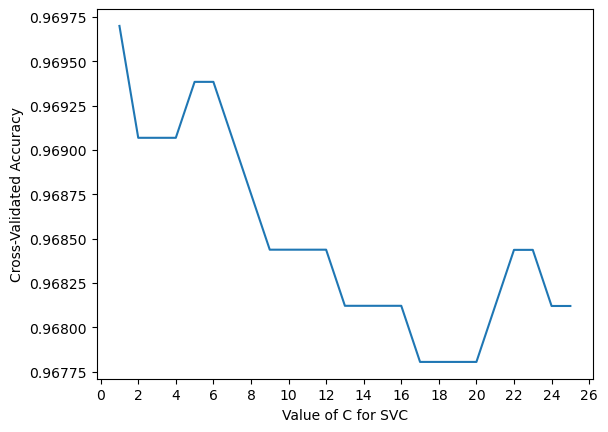

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


C_values=list(range(1,26))
# plotting the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0,27,2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')

From the above plot we can see that accuracy has been close to 97% for C=1 and C=6 and then it drops around 96.8% and remains constant.

Let us look into more detail of what is the exact value of C which is giving us a good accuracy score

In [57]:
C_range=list(np.arange(0.1,6,0.1))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='linear', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
    

[0.9706474863235236, 0.9693846583875733, 0.9693836601046201, 0.9693836601046201, 0.9696991175178692, 0.9696991175178692, 0.9693836601046201, 0.9696981192349158, 0.9693826618216667, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9696991175178692, 0.9690672044084174, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.969068202691371, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.9693836601046201, 0.969

Text(0, 0.5, 'Cross-Validated Accuracy')

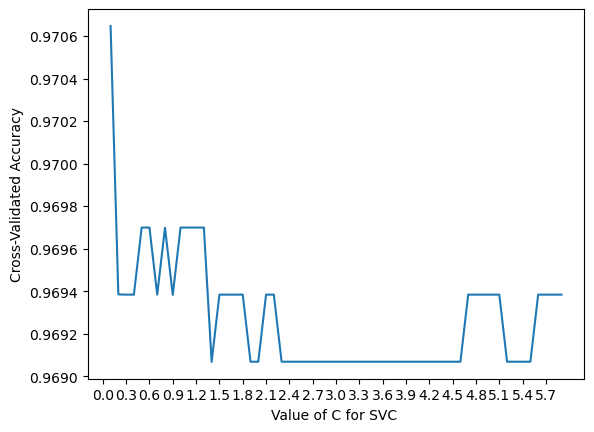

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

C_values=list(np.arange(0.1,6,0.1))
# plotting the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(C_values,acc_score)
plt.xticks(np.arange(0.0,6,0.3))
plt.xlabel('Value of C for SVC ')
plt.ylabel('Cross-Validated Accuracy')

Accuracy score is highest for C=0.1.

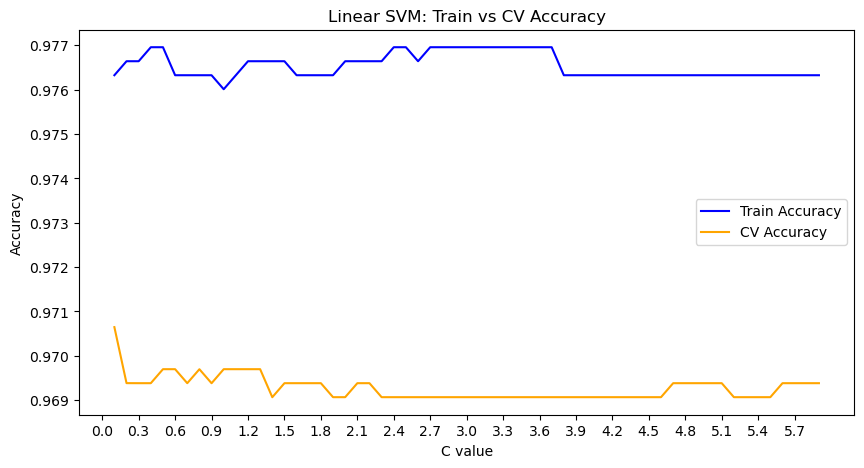

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define C values
C_values = np.arange(0.1, 6, 0.1)

# Lists to store accuracies
train_scores = []
cv_scores = []

for C in C_values:
    svc = SVC(kernel='linear', C=C)
    
    # Fit on full training set to get training accuracy
    svc.fit(X, y)
    train_scores.append(svc.score(X, y))
    
    # 10-fold CV accuracy
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Convert to numpy arrays
train_scores = np.array(train_scores)
cv_scores = np.array(cv_scores)

# Plot
plt.figure(figsize=(10,5))
plt.plot(C_values, train_scores, label='Train Accuracy', color='blue')
plt.plot(C_values, cv_scores, label='CV Accuracy', color='orange')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Linear SVM: Train vs CV Accuracy')
plt.legend()
plt.xticks(np.arange(0, 6, 0.3))
plt.show()


In [61]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Define C values
C_values = np.arange(0.1, 6, 0.1)

# Lists to store accuracies
train_scores = []
cv_scores = []

for C in C_values:
    svc = SVC(kernel='linear', C=C)
    
    # Training accuracy on full dataset
    svc.fit(X, y)
    train_scores.append(svc.score(X, y))
    
    # 10-fold CV accuracy
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Convert lists to arrays
train_scores = np.array(train_scores)
cv_scores = np.array(cv_scores)

# Find the C with highest CV accuracy
best_index = np.argmax(cv_scores)
best_C = C_values[best_index]
best_train_acc = train_scores[best_index]
best_cv_acc = cv_scores[best_index]

# Print numbers only
print("Best C value:", best_C)
print("Training Accuracy at Best C:", best_train_acc)
print("CV Accuracy at Best C:", best_cv_acc)


Best C value: 0.1
Training Accuracy at Best C: 0.9763257575757576
CV Accuracy at Best C: 0.9706474863235236


### RBF
Taking kernel as rbf and taking different values gamma

In [63]:
gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744, 0.9061883560276325, 0.6016421754582119, 0.49905362776025236]


Text(0, 0.5, 'Cross-Validated Accuracy')

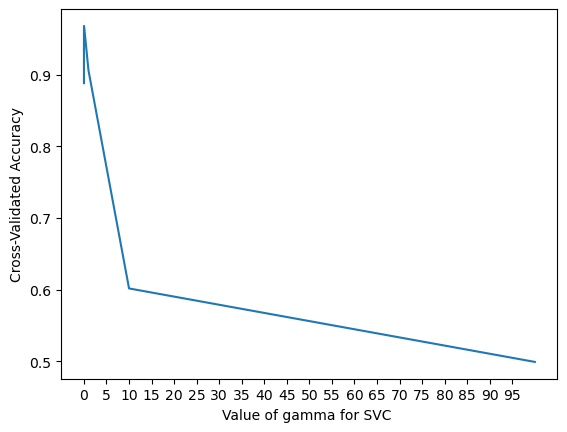

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
# plotting the value of gamma for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.xticks(np.arange(0.0001,100,5))
plt.ylabel('Cross-Validated Accuracy')

We can see that for gamma=10 and 100 the kernel is performing poorly.We can also see a slight dip in accuracy score when gamma is 1.Let us look into more details for the range 0.0001 to 0.1.

In [66]:
gamma_range=[0.0001,0.001,0.01,0.1]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.888240226809887, 0.9551820868106857, 0.9681168390368565, 0.9636874575729744]


Text(0, 0.5, 'Cross-Validated Accuracy')

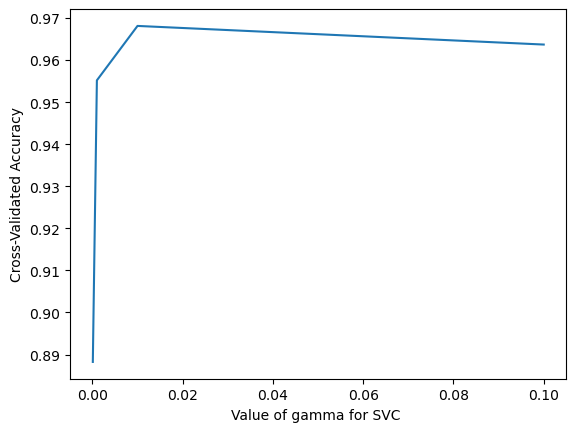

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.0001,0.001,0.01,0.1]

# plotting the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

The score increases steadily and raches its peak at 0.01 and then decreases till gamma=1.Thus Gamma should be around 0.01.

In [69]:
#Let us look into more detail for gamma values
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score) 

[0.9681168390368565, 0.9681168390368565, 0.9681148424709501, 0.9671664736652957, 0.9665325639899376]


Text(0, 0.5, 'Cross-Validated Accuracy')

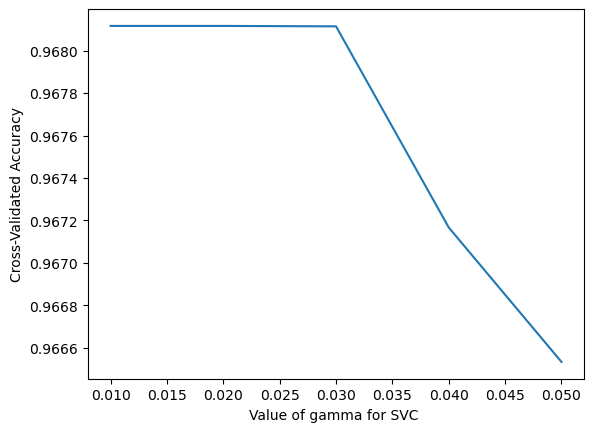

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

We can see there is constant decrease in the accuracy score as gamma value increase.Thus gamma=0.01 is the best parameter.

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

gamma_range = [0.01, 0.02, 0.03, 0.04, 0.05]
acc_score = []

# Compute cross-validated accuracy for each gamma
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

# Print cross-validated scores
print("Cross-validated accuracy scores for each gamma:", acc_score)

# Find the best gamma
best_gamma_index = acc_score.index(max(acc_score))
best_gamma = gamma_range[best_gamma_index]
best_accuracy = acc_score[best_gamma_index]

print("Best gamma:", best_gamma)
print("Cross-validated accuracy for best gamma:", best_accuracy)

# Train SVM on full training data to get training accuracy
best_svc = SVC(kernel='rbf', gamma=best_gamma)
best_svc.fit(X, y)
train_accuracy = best_svc.score(X, y)

print("Training accuracy for best gamma:", train_accuracy)


Cross-validated accuracy scores for each gamma: [0.9681168390368565, 0.9681168390368565, 0.9681148424709501, 0.9671664736652957, 0.9665325639899376]
Best gamma: 0.01
Cross-validated accuracy for best gamma: 0.9681168390368565
Training accuracy for best gamma: 0.9766414141414141


In [165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Predict using the trained model
y_pred = best_svc.predict(X)
y_true = y

# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision
precision = precision_score(y_true, y_pred, average='macro')

# Recall
recall = recall_score(y_true, y_pred, average='macro')

# F1 Score
f1 = f1_score(y_true, y_pred, average='macro')

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Print results
print("Model:", type(best_svc).__name__)
print("Best gamma:", best_gamma)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)

# Detailed report (optional but recommended)
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))


Model: SVC
Best gamma: 0.01
Accuracy: 0.9706439393939394
Precision: 0.9713896164085318
Recall: 0.9706439393939394
F1 Score: 0.9706323254343117
Confusion Matrix:
 [[1506   78]
 [  15 1569]]

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1584
           1       0.95      0.99      0.97      1584

    accuracy                           0.97      3168
   macro avg       0.97      0.97      0.97      3168
weighted avg       0.97      0.97      0.97      3168



### Poly: Taking polynomial kernel with different degree

In [74]:
degree=[2,3,4,5,6]
acc_score=[]
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)

[0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]


Text(0, 0.5, 'Cross-Validated Accuracy')

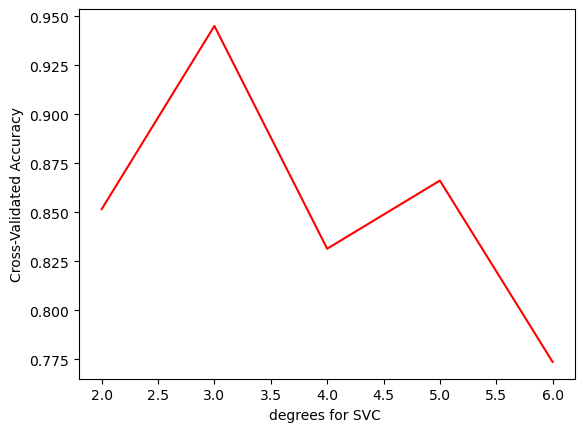

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

degree=[2,3,4,5,6]

# plot the value of degree for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(degree,acc_score,color='r')
plt.xlabel('degrees for SVC ')
plt.ylabel('Cross-Validated Accuracy')

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

degree = [2, 3, 4, 5, 6]
acc_score = []

# Compute cross-validated accuracy for each degree
for d in degree:
    svc = SVC(kernel='poly', degree=d)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())

# Print all scores
print("Accuracy scores for each degree:", acc_score)

# Find the best degree and its accuracy
best_degree_index = acc_score.index(max(acc_score))
best_degree = degree[best_degree_index]
best_accuracy = acc_score[best_degree_index]

print("Best degree:", best_degree)
print("Accuracy for best degree:", best_accuracy)


Accuracy scores for each degree: [0.8515842750469194, 0.9450654873617378, 0.8313989937307829, 0.8661622010142555, 0.7736463283152977]
Best degree: 3
Accuracy for best degree: 0.9450654873617378


In [77]:
# Train SVM on full data with best degree to get training accuracy
best_svc = SVC(kernel='poly', degree=best_degree)
best_svc.fit(X, y)
train_accuracy = best_svc.score(X, y)

print("Training accuracy for best degree:", train_accuracy)


Training accuracy for best degree: 0.9706439393939394


kernel - linear, rbf, poly (linear)
C values - 0.1 best
gamma- 0.1
poly - degree 3 

Now performing SVM by taking hyperparameter C=0.1 and kernel as linear

In [80]:
from sklearn.svm import SVC
svc= SVC(kernel='linear',C=0.1)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9747634069400631


In [81]:
#With K-fold cross validation(where K=10)
svc=SVC(kernel='linear',C=0.1)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.90851735 0.97160883 0.97476341 0.97791798 0.95899054 0.99053628
 0.99369085 0.97791798 0.95886076 0.99367089]


In [82]:
print(scores.mean())

0.9706474863235236


Now performing SVM by taking hyperparameter gamma=0.01 and kernel as rbf

In [84]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',gamma=0.01)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9668769716088328

In [85]:
svc=SVC(kernel='rbf',gamma=0.01)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.92113565 0.94637224 0.97791798 0.97791798 0.95583596 0.99684543
 0.99369085 0.98107256 0.93670886 0.99367089]


In [86]:
print(scores.mean())

0.9681168390368565


Now performing SVM by taking hyperparameter degree=3 and kernel as poly

In [88]:
from sklearn.svm import SVC
svc= SVC(kernel='poly',degree=3)
svc.fit(X_train,y_train)
y_predict=svc.predict(X_test)
accuracy_score= metrics.accuracy_score(y_test,y_predict)
print(accuracy_score)

0.9589905362776026


In [89]:
svc=SVC(kernel='poly',degree=3)
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
print(scores)

[0.89274448 0.94952681 0.93059937 0.92744479 0.94952681 0.99369085
 0.98422713 0.96529968 0.87974684 0.9778481 ]


In [90]:
print(scores.mean())

0.9450654873617378


Let us perform Grid search technique to find the best parameter

In [101]:
from sklearn.svm import SVC
svm_model= SVC()

In [103]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }

In [105]:
# takes nearly 20-30 mins
from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [107]:
model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.9569745728424264


In [109]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [111]:
y_pred= model_svm.predict(X_test)
print(metrics.accuracy_score(y_pred,y_test))

0.9589905362776026


In [113]:
import pandas as pd

results = pd.DataFrame(model_svm.cv_results_)


In [115]:
kernel_comparison = (
    results.groupby("param_kernel")["mean_test_score"]
    .max()
    .reset_index()
    .sort_values(by="mean_test_score", ascending=False)
)

print(kernel_comparison)


  param_kernel  mean_test_score
0         poly         0.956975


In [117]:
best_svm = model_svm.best_estimator_
best_svm

SVC(C=0.9, gamma=0.05, kernel='poly')

In [163]:
# way #1 to find evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = best_svm.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9589905362776026

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96       311
           1       0.94      0.98      0.96       323

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634


Confusion Matrix:
 [[290  21]
 [  5 318]]


In [121]:
# way #2 t find evaluation metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict using the best SVM model
y_pred_svm_best = best_svm.predict(X_test)

# Calculate metrics
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
precision_svm_best = precision_score(y_test, y_pred_svm_best)
recall_svm_best = recall_score(y_test, y_pred_svm_best)
f1_svm_best = f1_score(y_test, y_pred_svm_best)
conf_matrix_svm_best = confusion_matrix(y_test, y_pred_svm_best)

# Print the metrics
print("Accuracy score is {}".format(accuracy_svm_best))
print("Precision score is {}".format(precision_svm_best))
print("Recall score is {}".format(recall_svm_best))
print("F1 score is {}".format(f1_svm_best))
print("Confusion matrix is:")
print("{}".format(conf_matrix_svm_best))


Accuracy score is 0.9589905362776026
Precision score is 0.9380530973451328
Recall score is 0.9845201238390093
F1 score is 0.960725075528701
Confusion matrix is:
[[290  21]
 [  5 318]]


## Sigmoid (extra kernal: Just to know)

In [124]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9763406940063092


In [126]:
svc=SVC(kernel='sigmoid')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7933753943217665


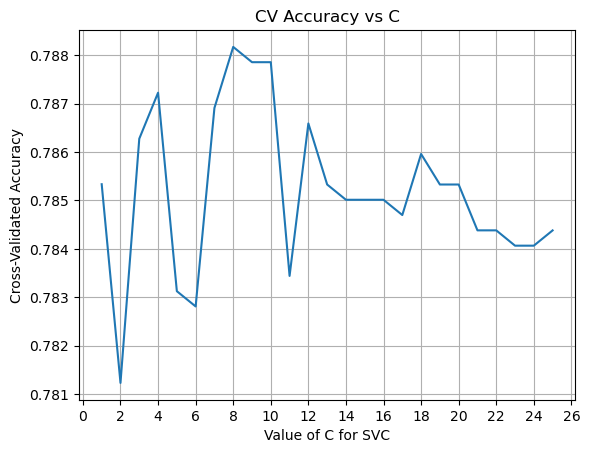

In [127]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C_values = list(range(1, 26))  # C values from 1 to 25

# Calculate cross-validated accuracy for EACH C value
acc_scores = []

for C in C_values:
    svc = SVC(kernel='sigmoid', C=C)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_scores.append(scores.mean())  # Store mean CV score for this C

# Now plot
plt.plot(C_values, acc_scores)
plt.xticks(np.arange(0, 27, 2))
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('CV Accuracy vs C')
plt.grid(True)
plt.show()

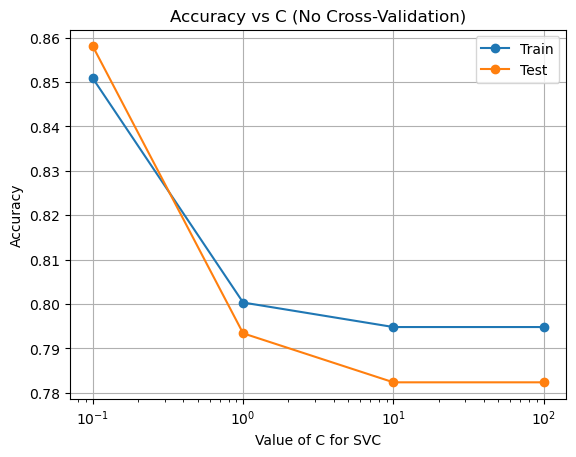

In [129]:
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np

C_range = [0.1, 1, 10, 100]

# Calculate mean accuracy for each C value
mean_train_scores = []
mean_test_scores = []

for C in C_range:
    svc = SVC(kernel='sigmoid', C=C)
    svc.fit(X_train, y_train)
    
    mean_train_scores.append(accuracy_score(y_train, svc.predict(X_train)))
    mean_test_scores.append(accuracy_score(y_test, svc.predict(X_test)))

# Plot
plt.plot(C_range, mean_train_scores, marker='o', label='Train')
plt.plot(C_range, mean_test_scores, marker='o', label='Test')
plt.xscale('log')
plt.xlabel('Value of C for SVC')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C (No Cross-Validation)')
plt.legend()
plt.grid(True)
plt.show()

Recommended C value: 0.1

Param with CV

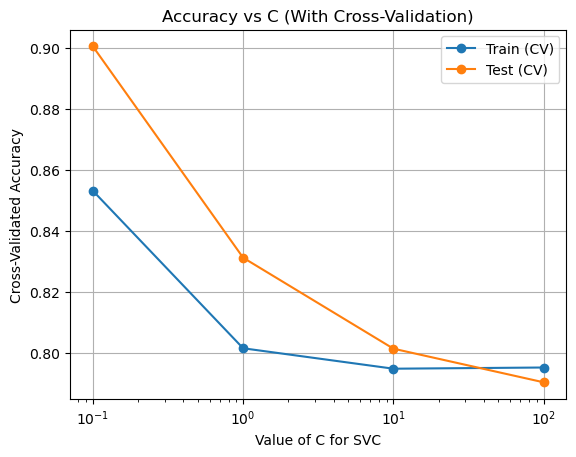

Mean Train CV Scores: [0.8532040708350191, 0.8015032211882606, 0.7947963026360835, 0.7951900034234851]
Mean Test CV Scores: [0.9005952380952381, 0.8312251984126984, 0.8013640873015874, 0.7903273809523809]


In [132]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

C_range = [0.1, 1, 10, 100]

# Calculate CROSS-VALIDATED accuracy for each C value
mean_train_scores = []
mean_test_scores = []

for C in C_range:
    svc = SVC(kernel='sigmoid', C=C)
    
    # Cross-validation on training set
    train_scores = cross_val_score(svc, X_train, y_train, cv=10, scoring='accuracy')
    mean_train_scores.append(train_scores.mean())
    
    # Cross-validation on test set (or you can use the whole dataset X, y)
    test_scores = cross_val_score(svc, X_test, y_test, cv=10, scoring='accuracy')
    mean_test_scores.append(test_scores.mean())

# Plot
plt.plot(C_range, mean_train_scores, marker='o', label='Train (CV)')
plt.plot(C_range, mean_test_scores, marker='o', label='Test (CV)')
plt.xscale('log')
plt.xlabel('Value of C for SVC')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs C (With Cross-Validation)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mean Train CV Scores: {mean_train_scores}")
print(f"Mean Test CV Scores: {mean_test_scores}")

Recommended C value: 0.1

## 3. XG Boost (Accuracy score for the XG Boost model: 97.48%)

In [135]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize model
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Train model
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Scores
xgb_train_score = xgb.score(X_train, y_train)
xgb_test_score = xgb.score(X_test, y_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)

# Display results
xgb_train_score, xgb_test_score, xgb_acc


(1.0, 0.9747634069400631, 0.9747634069400631)

In [136]:
xgb_train_score - xgb_test_score


0.025236593059936863

## XG_Boost (Only CV)

In [138]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

xgb = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Cross-validation ONLY on training data
xgb_cv_scores = cross_val_score(
    estimator=xgb,
    X=X_train,
    y=y_train,
    cv=10,
    scoring='accuracy'
)

xgb_cv_scores.mean(), xgb_cv_scores


(0.9822445613270674,
 array([0.98425197, 0.98425197, 0.97637795, 0.97637795, 0.98418972,
        0.97233202, 0.98418972, 0.99604743, 0.98814229, 0.97628458]))

In [139]:
from sklearn.metrics import accuracy_score

# Fit model on training data
xgb.fit(X_train, y_train)

# Predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_acc, test_acc


(1.0, 0.9747634069400631)

In [140]:
cv_acc = xgb_cv_scores.mean()

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Cross-Validation Accuracy: {cv_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 1.0000
Cross-Validation Accuracy: 0.9822
Test Accuracy: 0.9748


In [141]:
overfit_gap = train_acc - test_acc
overfit_gap


0.025236593059936863

## Conclusion:

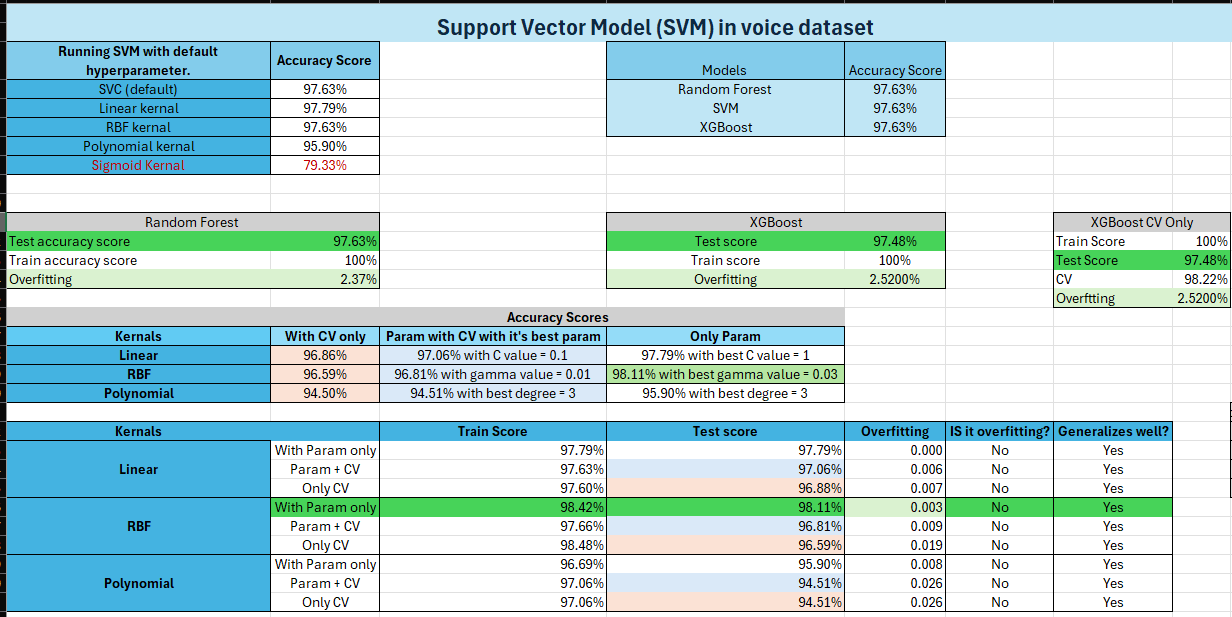

## Evaluation metrics for the finalized model

In [177]:
best_gamma = 0.03  # explicitly set the correct one
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC

# Train best model using best gamma
best_svc = SVC(kernel='rbf', gamma=best_gamma)
best_svc.fit(X_train, y_train)

# Predict on test data
y_test_pred = best_svc.predict(X_test)

# Evaluation metrics (TEST SET)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
cm = confusion_matrix(y_test, y_test_pred)

# Print results
print("Model:", type(best_svc).__name__)
print("Kernel: RBF")
print("Best gamma:", best_gamma)

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Model: SVC
Kernel: RBF
Best gamma: 0.03

Test Accuracy: 0.9810725552050473
Test Precision: 0.9810319948250983
Test Recall: 0.9811852309040049
Test F1 Score: 0.9810695410707355

Confusion Matrix:
 [[307   4]
 [  8 315]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       311
           1       0.99      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

